**AIVLE School 미니프로젝트**
### **네비게이션 주행데이터를 이용한 <span style="color:darkgreen">도착시각</span> 예측 문제**
---

<br>

#### **<span style="color:red">[미션 안내]</span>**
* 네비게이션 주행데이터를 읽어들여 데이터를 분석 및 전처리한 후 머신러닝과 딥러닝으로 도착시각을 예측하고 결과를 분석하세요.

#### **<span style="color:red">[유의 사항]</span>**
* 각 문항의 답안코드는 반드시 '#여기에 답안코드를 작성하세요'로 표시된 cell에 작성해야 합니다.
* 제공된 cell을 추가/삭제하고 다른 cell에 답안코드를 작성 시 채점되지 않습니다.
* 반드시 문제에 제시된 가이드를 읽고 답안 작성하세요.
* 문제에 변수명이 제시된 경우 반드시 해당 변수명을 사용하세요.
* 문제와 데이터는 제3자에게 공유하거나 개인적인 용도로 사용하는 등 외부로 유출할 수 없으며 유출로 인한 책임은 응시자 본인에게 있습니다.

<br>

### 1. scikit-learn 패키지는 머신러닝 교육을 위한 최고의 파이썬 패키지입니다.
### scikit-learn를 별칭(alias) sk로 임포트하는 코드를 작성하고 실행하세요.

In [1]:
# 여기에 답안코드를 작성하세요.
import sklearn as sk

<br>

### 2. Pandas는 데이터 분석을 위해 널리 사용되는 파이썬 라이브러리입니다.
### Pandas를 사용할 수 있도록 별칭(alias)을 pd로 해서 불러오세요.

In [2]:
# 여기에 답안코드를 작성하세요.
import pandas as pd

<br>

### 3. 모델링을 위해 분석 및 처리할 데이터 파일을 읽어오려고 합니다.
### Pandas함수로 데이터 파일을 읽어 데이터프레임 변수명 df에 할당하는 코드를 작성하세요.
* A0007IT.json 파일을 읽어 데이터 프레임 변수명 df에 할당하세요.

In [9]:
# 여기에 답안코드를 작성하세요.
df = pd.read_json('A0007IT.json')

<br>

In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic')

### 4. Address1(주소1)에 대한 분포도를 알아 보려고 합니다.
### Address1(주소1)에 대해 countplot그래프로 만들고 아래 가이드에 따라 답하세요.
* Seaborn을 활용하세요.
* 첫번째, Address1(주소1)에 대해서 분포를 보여주는 countplot그래프 그리세요.
* 두번째, 지역명이 없는 '-'에 해당되는 row(행)을 삭제하세요.

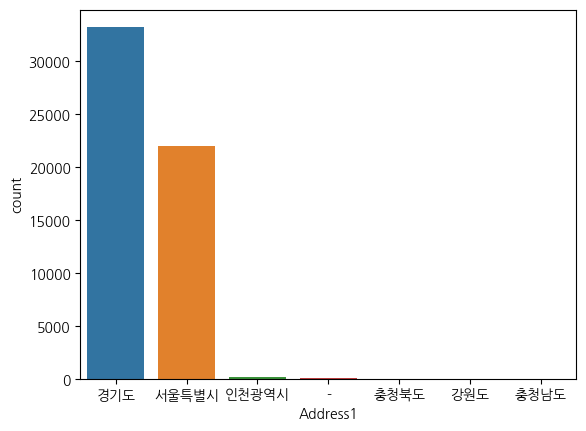

In [11]:
# 여기에 답안코드를 작성하세요.
import seaborn as sns

# 첫번째
sns.countplot(x='Address1', data=df)
plt.show()

# 두번째
del_idx = df.loc[df['Address1'] == '-'].index
df.drop(index=del_idx, axis=0, inplace=True)

<br>

### 5. 실주행시간과 평균시속의 분포를 같이 확인하려고 합니다.
### Time_Driving(실주행시간)과 Speed_Per_Hour(평균시속)을 jointplot 그래프로 만드세요.
* Seaborn을 활용하세요.
* X축에는 Time_Driving(실주행시간)을 표시하고 Y축에는 Speed_Per_Hour(평균시속)을 표시하세요.

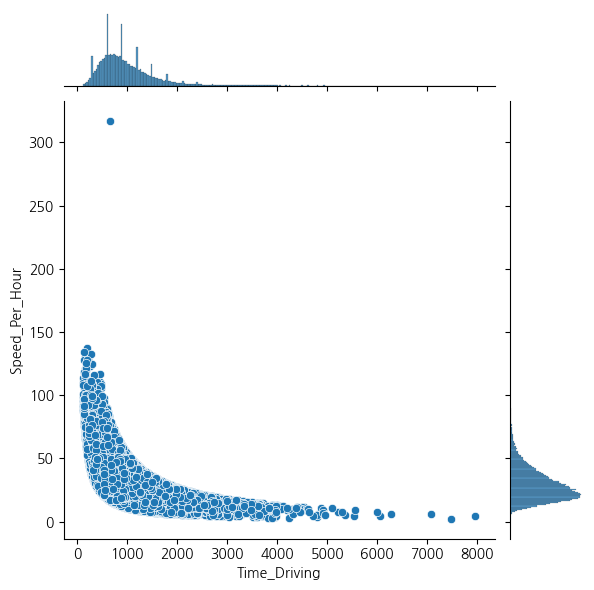

In [12]:
# 여기에 답안코드를 작성하세요.
sns.jointplot(x='Time_Driving', y='Speed_Per_Hour', data=df)
plt.show()

<br>

### 6. 위의 jointplot 그래프에서 시속 300이 넘는 이상치를 발견할 수 있습니다.
### jointplot 그래프에서 발견한 이상치 1개를 삭제하세요.
* 대상 데이터프레임: df
* jointplot 그래프를 보고 시속 300 이상되는 이상치를 찾아 해당 행(Row)을 삭제하세요.
* 전처리 반영 후에 새로운 데이터프레임 변수명 df_temp에 저장하세요.

In [13]:
# 여기에 답안코드를 작성하세요.
del_value = df.loc[df['Speed_Per_Hour'] >= 300].index
df_temp = df.drop(index=del_value, axis=0)

<br>

### 7. 모델링 성능을 제대로 얻기 위해서 결측치 처리는 필수입니다.
### 아래 가이드를 따라 결측치 처리하세요.
* 대상 데이터프레임: df_temp
* 결측치를 확인하는 코드를 작성하세요.
* 결측치가 있는 행(raw)를 삭제 하세요.
* 전처리 반영된 결과를 새로운 데이터프레임 변수명 df_na에 저장하세요.

In [15]:
# 여기에 답안코드를 작성하세요.
print(df_temp.isna().sum())
df_na = df_temp.dropna(axis=0)

Time_Departure    0
Time_Arrival      0
Distance          2
Time_Driving      3
Speed_Per_Hour    5
Address1          0
Address2          0
Signaltype        0
Weekday           0
Hour              0
Day               0
dtype: int64


<br>

### 8. 모델링 성능을 제대로 얻기 위해서 불필요한 변수는 삭제해야 합니다.
### 아래 가이드를 따라 불필요 데이터를 삭제 처리하세요.
* 대상 데이터프레임: df_na
* 'Time_Departure', 'Time_Arrival' 2개 컬럼을 삭제하세요.
* 전처리 반영된 결과를 새로운 데이터프레임 변수명 df_del에 저장하세요.

In [16]:
# 여기에 답안코드를 작성하세요.
drop_cols = ['Time_Departure', 'Time_Arrival']
df_del = df_na.drop(columns=drop_cols, axis=1)

<br>

### 9. 원-핫 인코딩(One-hot encoding)은 범주형 변수를 1과 0의 이진형 벡터로 변환하기 위하여 사용하는 방법입니다.
### 원-핫 인코딩으로 아래 조건에 해당하는 컬럼 데이터를 변환하세요.
* 대상 데이터프레임: df_del
* 원-핫 인코딩 대상: object 타입의 전체 컬럼
* 활용 함수: pandas의 get_dummies
* 해당 전처리가 반영된 결과를 데이터프레임 변수 df_preset에 저장해 주세요.

In [19]:
# 여기에 답안코드를 작성하세요.
temp = df_del.select_dtypes('object').columns
dummy_cols = temp.tolist()
df_preset = pd.get_dummies(columns=dummy_cols, data=df_del, drop_first=True)

<br>

### 10. 훈련과 검증 각각에 사용할 데이터셋을 분리하려고 합니다.
### Time_Driving(실주행시간) 컬럼을 label값 y로, 나머지 컬럼을 feature값 X로 할당한 후 훈련데이터셋과 검증데이터셋으로 분리하세요.
* 대상 데이터프레임: df_preset
* 훈련 데이터셋 label: y_train, 훈련 데이터셋 Feature: X_train
* 검증 데이터셋 label: y_valid, 검증 데이터셋 Feature: X_valid
* 훈련 데이터셋과 검증데이터셋 비율은 80:20
* random_state: 42
* Scikit-learn의 train_test_split 함수를 활용하세요.

In [23]:
# 여기에 답안코드를 작성하세요.
from sklearn.model_selection import train_test_split

target = "Time_Driving"

X = df_preset.drop(target, axis=1)
y = df_preset.loc[:, target]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

<br>

### 11. Time_Driving(실주행시간)을 예측하는 머신러닝 모델을 만들려고 합니다.
### 의사결정나무(decision tree)는 여러 가지 규칙을 순차적으로 적용하면서 독립 변수 공간을 분할하는 모형으로
### 분류(classification)와 회귀 분석(regression)에 모두 사용될 수 있습니다.
### 의사결정나무(decision tree)로 학습을 진행하세요.
* 트리의 최대 깊이: 5로 설정
* 노드를 분할하기 위한 최소한의 샘플 데이터수(min_samples_split): 3로 설정
* random_state: 120로 설정

In [24]:
# 여기에 답안코드를 작성하세요.
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5, min_samples_split=3, random_state=120)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=3, random_state=120)

<br>

### 12. 위 의사결정나무(decision tree) 모델의 성능을 평가하려고 합니다.
### 예측 결과의 mae(Mean Absolute Error)를 구하세요.
* 성능 평가는 검증 데이터셋을 활용하세요.
* 11번 문제에서 만든 의사결정나무(decision tree) 모델로 y값을 예측(predict)하여 y_pred에 저장하세요.
* 검증 정답(y_valid)과 예측값(y_pred)의 mae(Mean Absolute Error)를 구하고 dt_mae 변수에 저장하세요.

In [25]:
# 여기에 답안코드를 작성하세요.
from sklearn.metrics import mean_absolute_error

y_pred = dt.predict(X_valid)
dt_mae = mean_absolute_error(y_pred, y_valid)

<br>

##### **<span style="color:red">다음 문항을 풀기 전에</span> 아래 코드를 실행하세요.**

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.backend import clear_session

tf.random.set_seed(1)

<br>

### 13. Time_Driving(실주행시간)을 예측하는 딥러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* Tensoflow framework를 사용하여 딥러닝 모델을 만드세요.
* 히든레이어(hidden layer) 2개이상으로 모델을 구성하세요.
* dropout 비율 0.2로 Dropout 레이어 1개를 추가해 주세요.
* 손실함수는 MSE(Mean Squared Error)를 사용하세요.
* 하이퍼파라미터 epochs: 30, batch_size: 16으로 설정해주세요.
* 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용하세요.
* 학습정보는 history 변수에 저장해주세요

In [30]:
# 여기에 답안코드를 작성하세요.
clear_session()

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

es = EarlyStopping(monitor='val_loss',
                   patience=3,
                   restore_best_weights=True,
                   verbose=1)

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history = model.fit(X_train, y_train, epochs=30, batch_size=16, callbacks=[es], validation_data=(X_valid, y_valid))

Epoch 1/30
2772/2772 [==============================] - 6s 2ms/step - loss: 142899.8281 - mse: 142899.8281 - val_loss: 75041.7812 - val_mse: 75041.7812
Epoch 2/30
2772/2772 [==============================] - 4s 2ms/step - loss: 52115.4453 - mse: 52115.4453 - val_loss: 32084.6953 - val_mse: 32084.6953
Epoch 3/30
2772/2772 [==============================] - 4s 2ms/step - loss: 35000.0898 - mse: 35000.0898 - val_loss: 49682.9453 - val_mse: 49682.9453
Epoch 4/30
2772/2772 [==============================] - 5s 2ms/step - loss: 25612.9844 - mse: 25612.9844 - val_loss: 14349.8125 - val_mse: 14349.8125
Epoch 5/30
2772/2772 [==============================] - 5s 2ms/step - loss: 20582.4043 - mse: 20582.4043 - val_loss: 69493.8828 - val_mse: 69493.8828
Epoch 6/30
2772/2772 [==============================] - 4s 2ms/step - loss: 16275.6572 - mse: 16275.6572 - val_loss: 49458.5781 - val_mse: 49458.5781
Epoch 7/30
2772/2772 [==============================] - 6s 2ms/step - loss: 13346.7988 - mse: 1334

<br>

### 14. 위 딥러닝 모델의 성능을 평가하려고 합니다.
### Matplotlib 라이브러리 활용해서 학습 mse와 검증 mse를 그래프로 표시하세요.
* 1개의 그래프에 학습 mse과 검증 mse 2가지를 모두 표시하세요.
* 위 2가지 각각의 범례를 'mse', 'val_mse'로 표시하세요.
* 그래프의 타이틀은 'Model MSE'로 표시하세요.
* X축에는 'Epochs'라고 표시하고 Y축에는 'MSE'라고 표시하세요.

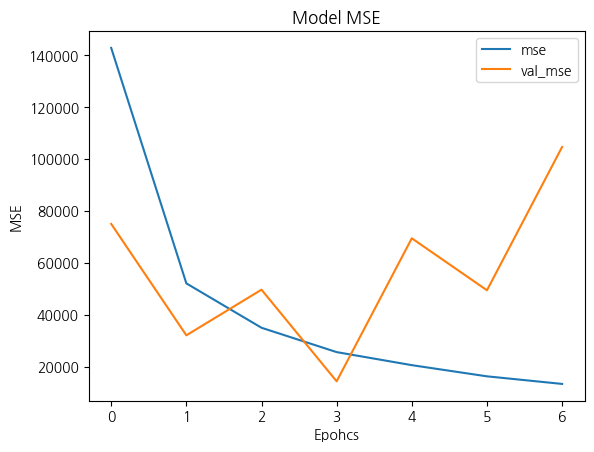

In [31]:
# 여기에 답안코드를 작성하세요.
mse = history.history['mse']
val_mse = history.history['val_mse']

plt.plot(mse, label='mse')
plt.plot(val_mse, label='val_mse')
plt.title("Model MSE")
plt.xlabel("Epohcs")
plt.ylabel("MSE")
plt.legend()
plt.show()